In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from astropy.io import ascii


In [15]:
#set plotting parameters
import matplotlib as mpl
mpl.rcParams['font.size'] = 18.
mpl.rcParams['figure.figsize'] = [8., 6.]
mpl.rcParams['figure.dpi'] = 100


# Example 1: download WISE light curves #

In [2]:
from wise_light_curves import *

`download_single_data`: before using this function, create a folder where you want to store the WISE light curve data. In this example, we create a folder "ipac". Then we call `download_single_data` to download the WISE light curves, including AllWISE and NeoWISE data, using its ra dec coordinate. Notice that if `download_single_data` finds a file with the same requested file name in the folder, then `download_single_data` does not download the data.

In [3]:
ra = 113.7677455178
dec = -33.1498446736699
download_single_data(name='wise_0735-3308', ra=ra, dec=dec, root_path='ipac/', radius=2.)

# Example 2: explore the WISE light curves

We first read the ipac files using astropy's `ascii` function:

In [39]:
allwise = ascii.read('ipac/wise_0735-3308_allwise.ipac', format='ipac')
neowise = ascii.read('ipac/wise_0735-3308_neowise.ipac', format='ipac')

We use the function `only_good_data_v1` removes bad photometric measurements. The criteria used in this function are detailed in Hwang & Zakamska (https://arxiv.org/abs/1909.06375). Users are welcome to design their own criteria. 

In [42]:
allwise, neowise = only_good_data_v1(allwise, neowise)

After filtering out bad data, we can explore the WISE light curves.

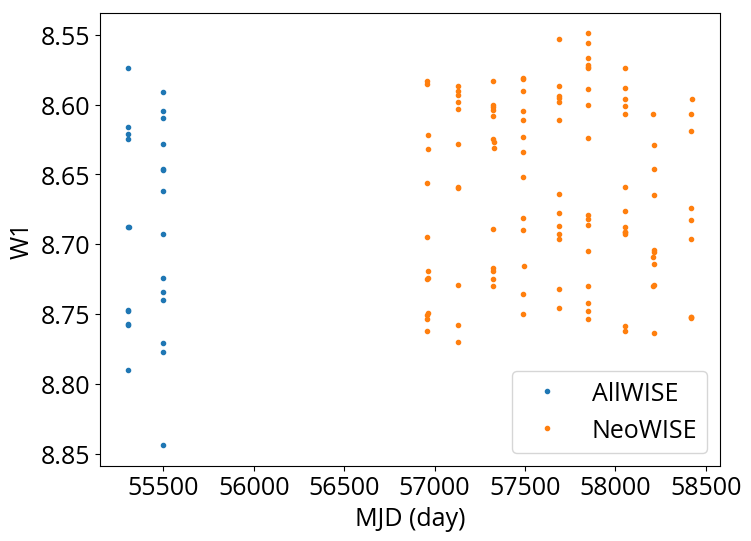

In [48]:
plt.figure()
plt.plot(allwise['mjd'], allwise['w1mpro_ep'], '.', label='AllWISE')
plt.plot(neowise['mjd'], neowise['w1mpro'], '.', label='NeoWISE')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('MJD (day)')
plt.ylabel('W1')
plt.show()

`plot_part_lightcurve` helps to see the variation on a shorter timescale. It uses the parameter `time_lapse_threshold` to cut the light curves into several segments, and present these segments with a magnitude shift (`mag_shift`).

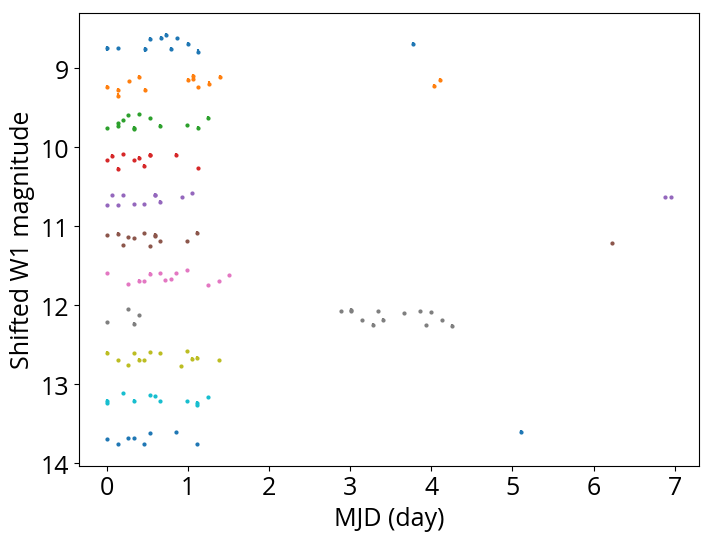

In [50]:
plt.figure()
plot_part_lightcurve(allwise, neowise, 
                     time_lapse_threshold=30.,
                     mag_shift=0.5, ms=2.,
                     band='w1'
                    )

plt.ylabel('Shifted W1 magnitude')
plt.show()

# Example 3: plot phase-folded light curves

`make_full_lightcurve_multibands` combine the AllWISE data and NeoWISE data, and returns arrays of time, magnitudes, matnitude errors, and filters.

In [27]:
t, mag, mag_err, filts = make_full_lightcurve_multibands(allwise, neowise)
t_w1 = t[filts == 'w1']
mag_w1 = mag[filts == 'w1']
mag_err_w1 = mag_err[filts == 'w1']

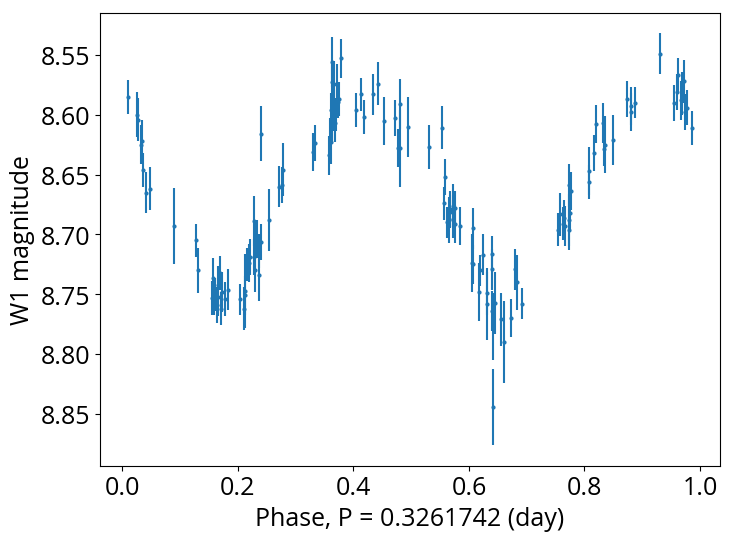

In [52]:
period = 0.1630871147 * 2

plt.figure()
plt.errorbar((t_w1 % period) / period, mag_w1, mag_err_w1, fmt='o', ms=2.)

plt.gca().invert_yaxis()
plt.xlabel('Phase, P = {:.7} (day)'.format(period))
plt.ylabel('W1 magnitude')
plt.show()